In [452]:
#Importação de bibliotecas para tratamento dos dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [453]:
#Leitura da base de dados Base_RH com 1470 funcionários
df = pd.read_csv('Base_RH_final.csv',sep=';')

In [454]:
#Entendendo os dados
print('Linhas e Colunas: ',df.shape)

#print(df.head())
print('Títulos das colunas: ',df.columns)

#Resumo das variáveis
print(df.info())

#Checando duplicidades
print('Duplicados: ', df.duplicated().sum())

#Describe com as principais medidas resumo, removendo a variável ID (1a coluna) e transpondo para facilitar a visualização
df.describe().T.iloc[1:,1:]

Linhas e Colunas:  (1470, 21)
Títulos das colunas:  Index(['ID', 'Funcionário_deixou_a_empresa', 'Idade', 'Frequência de Viagens',
       'Distância_do_trabalho', 'Formação', 'E-Sat', 'Gênero', 'Estado_Civil',
       'Salário', 'Qte_Empresas_Trabalhadas', 'Faz_hora_extras?',
       'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
       'Horas_de_treinamento', 'Equilibrio_de_Vida', 'Tempo_de_empresa',
       'Anos_no_mesmo_cargo', 'Anos_desde_a_ultima_promocao',
       'Anos_com_o_mesmo_chefe'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            1470 non-null   int64 
 1   Funcionário_deixou_a_empresa  1470 non-null   object
 2   Idade                         1470 non-null   int64 
 3   Frequência de Viagens         1470 non-null   object
 4   Di

,mean,std,min,25%,50%,75%,max
Idade,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
Distância_do_trabalho,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Salário,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
Qte_Empresas_Trabalhadas,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
Perc_de_aumento,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
Qte_ações_da_empresa,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
Tempo_de_carreira,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
Horas_de_treinamento,2.799320,1.289271,0.0,2.0,3.0,3.0,6.0
Tempo_de_empresa,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0
Anos_no_mesmo_cargo,4.229252,3.623137,0.0,2.0,3.0,7.0,18.0


Report inicial:
1) Dataset com 1470 observações, 21 variáveis
2) Não há observações com valores missing / nulos
3) Das 20 variáveis, 13 são numéricas e 8 são categóricas

In [455]:
#Definição de funções para criação dos gráficos de barra com variáveis Qualitativas

#Tabela com medidas resumo
def tabela_bivariada(data,var):
    
    df_tab = pd.DataFrame(data[var].value_counts()).sort_values(by=var,ascending=False)
    total = df_tab.sum()
    df_tab['Freq_Relativa'] = (df_tab/total).round(decimals=4)
    df_tab['Freq_Acumulada'] = df_tab['Freq_Relativa'].cumsum().round(decimals=2)
    return df_tab;

#Criação do gráfico de barras
def cria_grafico_var_qualitativa(tab):

    # Aumenta o tamanho do gráfico (largura 8 e altura 4)
    fig = plt.figure(figsize=(8,4))
    
    # Cria um gráfico de barras usando o indice da tabela como rótulos do eixo X
    cor = np.random.rand(3)
    plt.bar(tab.index,tab['Freq_Relativa'],width = 0.7, tick_label=tab.index,color=cor,alpha=0.6)

    plt.ylim(0,tab['Freq_Relativa'].max()+0.2)
    plt.title("Frequência Relativa de {}".format(tab.index.name))

    # cria um conjunto de pares de rótulos e frequencias relativas
    for x,y in zip(tab.index,tab['Freq_Relativa']):

        # formata o rotulo do percentual
        rotulo = "{:.2%}".format(y)

        # coloca o rotulo na posição (x,y), alinhado ao centro e com distância 0,5 do ponto (x,y)
        plt.annotate(rotulo,(x,y),ha='center',textcoords="offset points",xytext=(0,5))
        

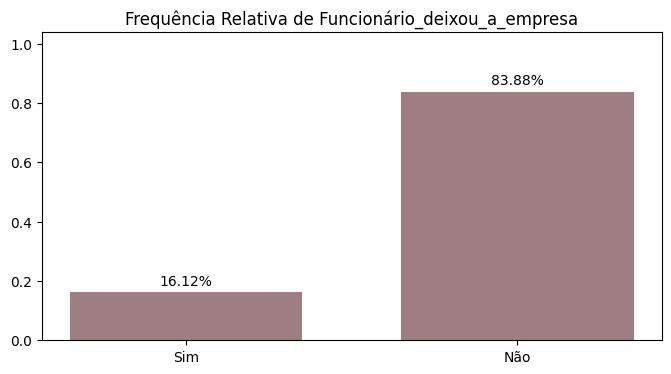

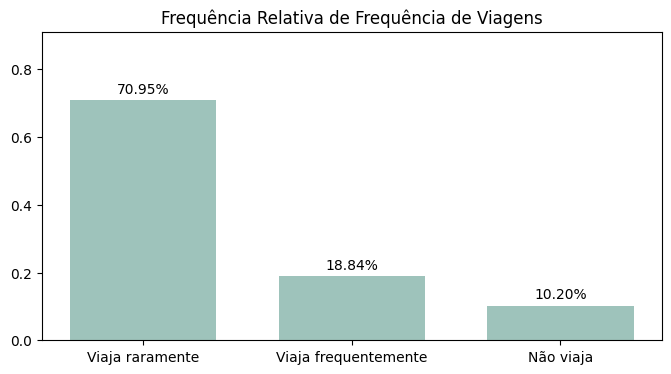

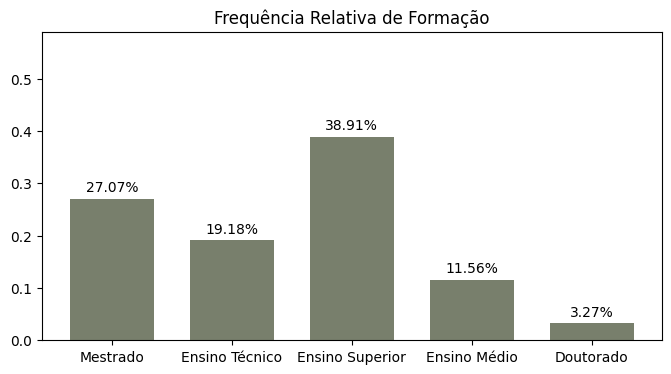

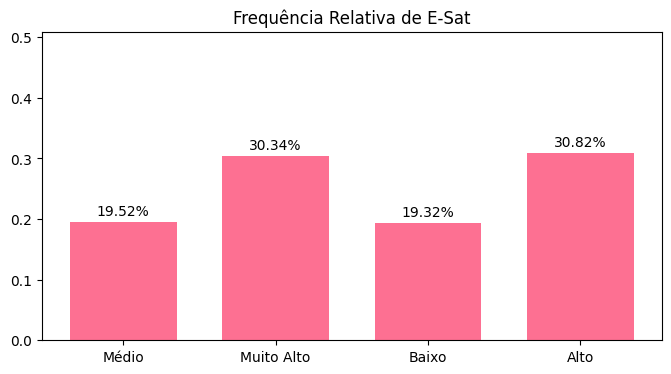

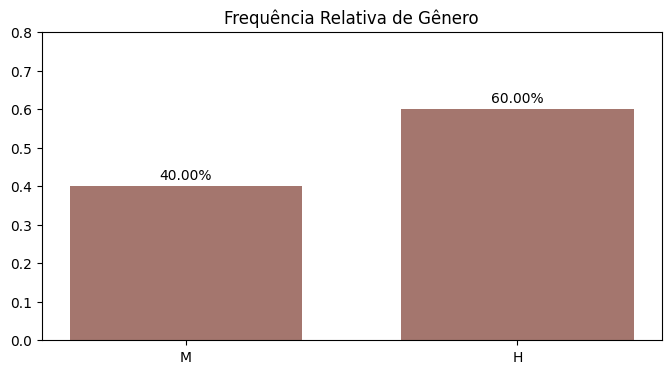

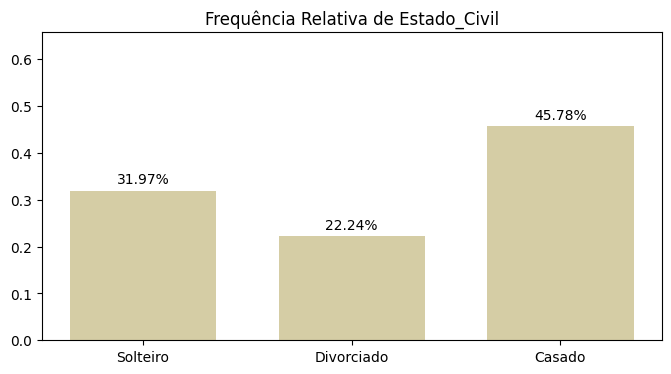

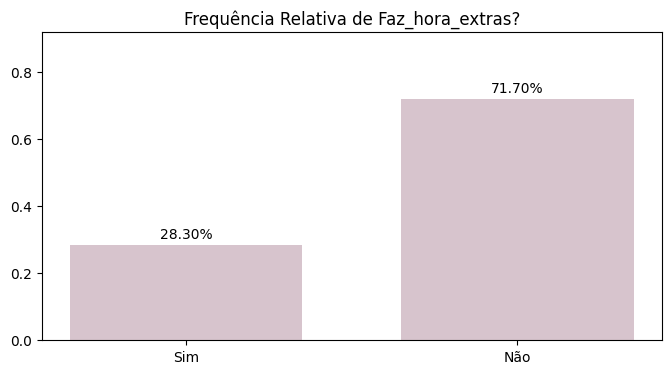

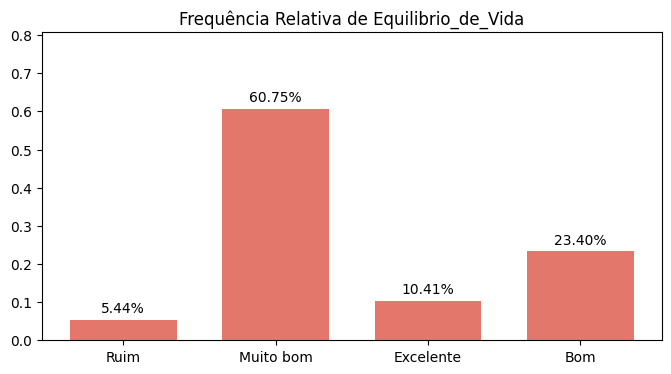

In [456]:
# Filtra o dataframe com variáveis qualitativas
df_qualitativas = df.loc[:,((df.dtypes == 'object') | 
                                (df.dtypes == 'category') |
                                (df.dtypes == 'bool'))]

for var in df_qualitativas:
    tab = tabela_bivariada(df,var)
    cria_grafico_var_qualitativa(tab)

In [457]:
#Função para criar um conjunto de gráficos (Histograma + Boxplot) das variáveis quantitativas
#Boxplot já inclui a separação por variável categórica "Deixou a Empresa" porque auxilia na análise
def cria_grafico_var_quant(df,var):

    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

    # Cria o 1o gráfico - Histograma
    cor = np.random.rand(3)
    ax1.hist(df[var],bins=10, color=cor,alpha=0.4)
    ax1.title.set_text("Histograma de {}".format(var))

    # Cria o 2o gráfico - Boxplot agrupado por variável categórica "Funcionário deixou a empresa"
    ax2.title.set_text("Boxplot de {}".format(var))
    sns.boxplot(x="Funcionário_deixou_a_empresa",y=df[var],data=df)

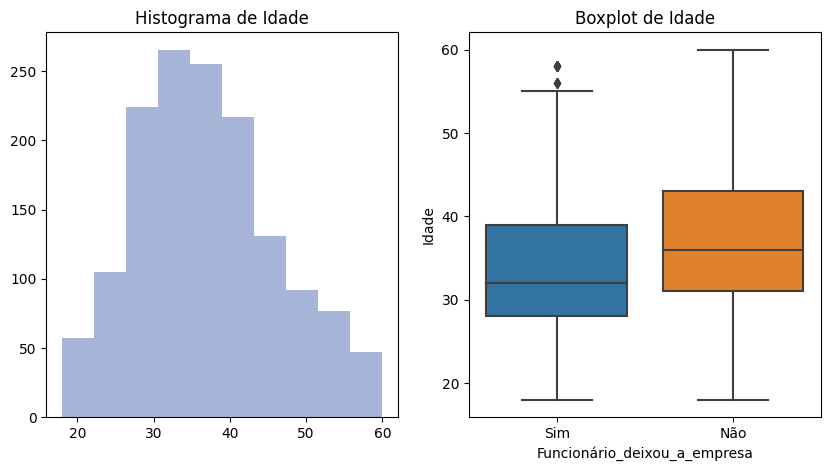

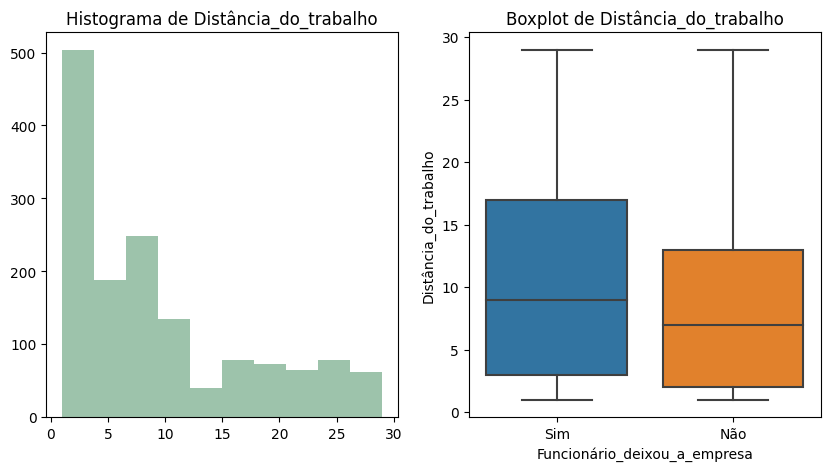

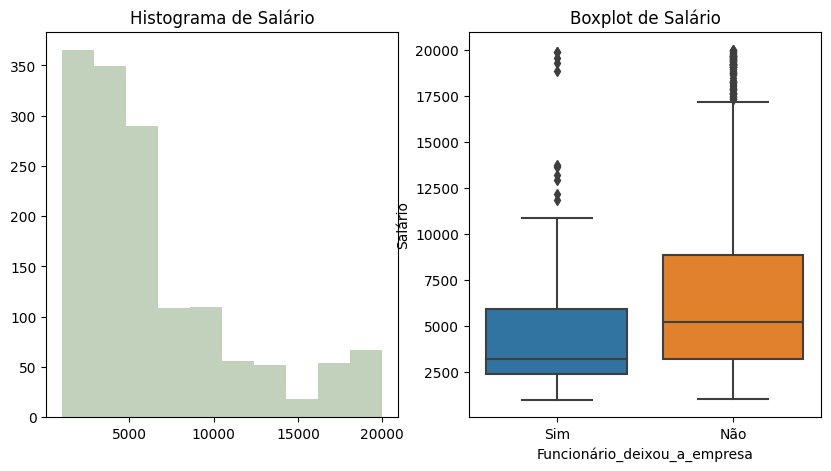

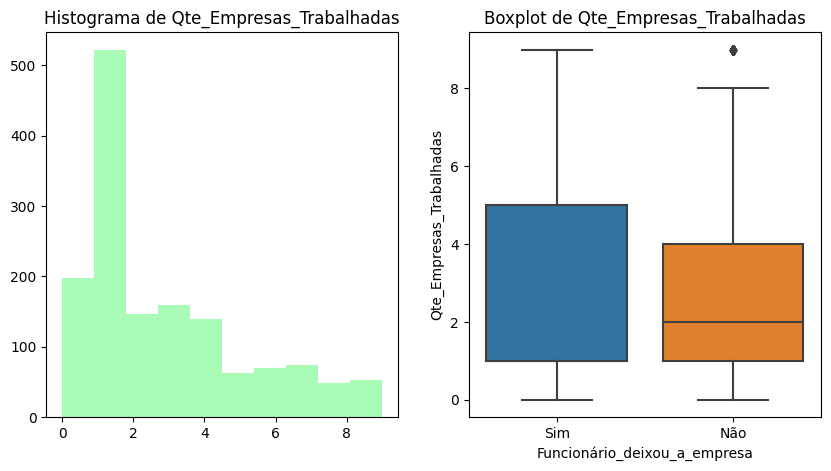

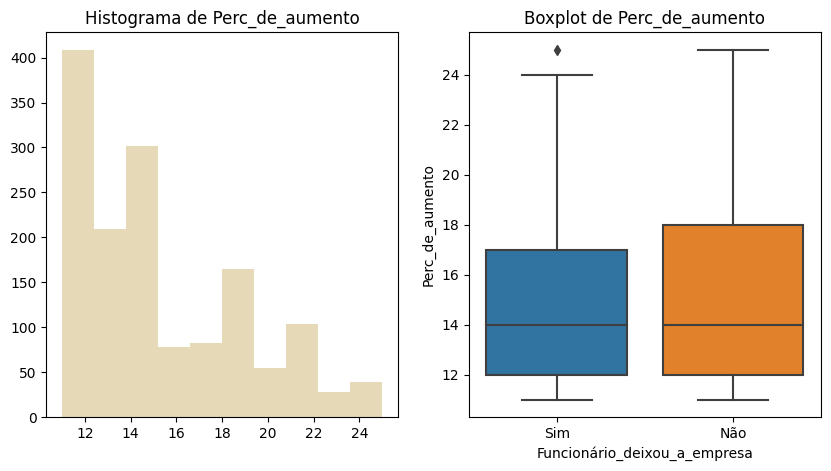

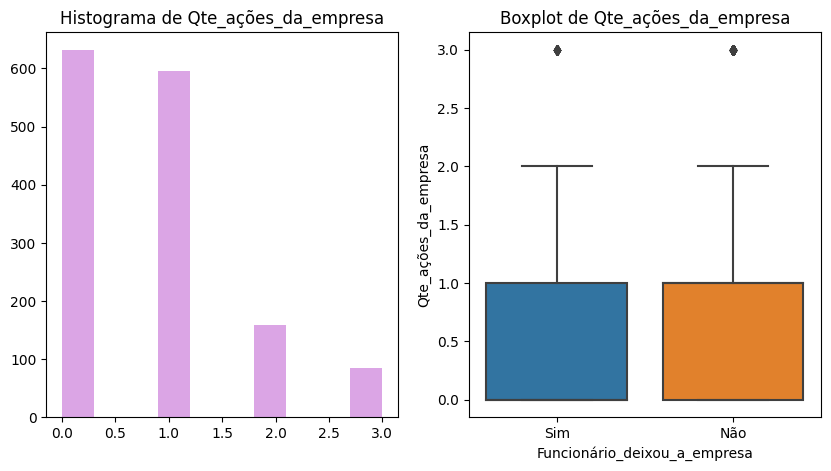

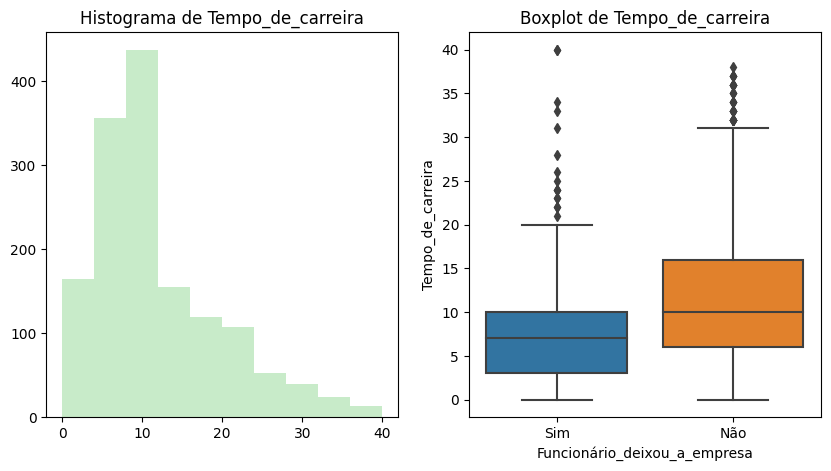

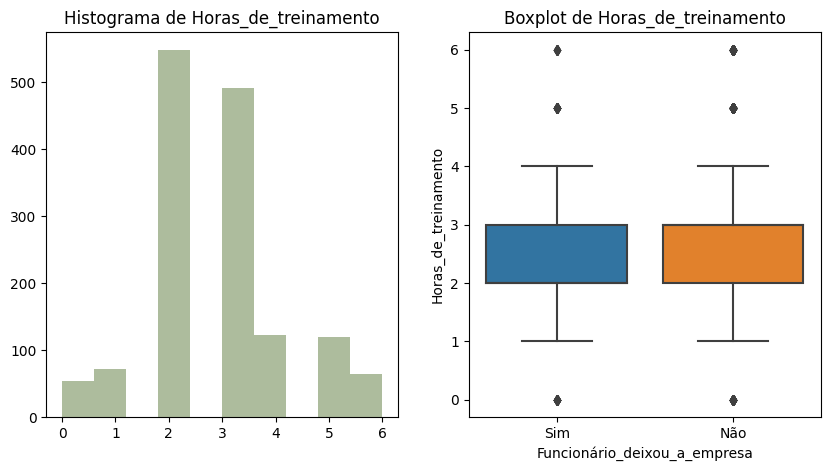

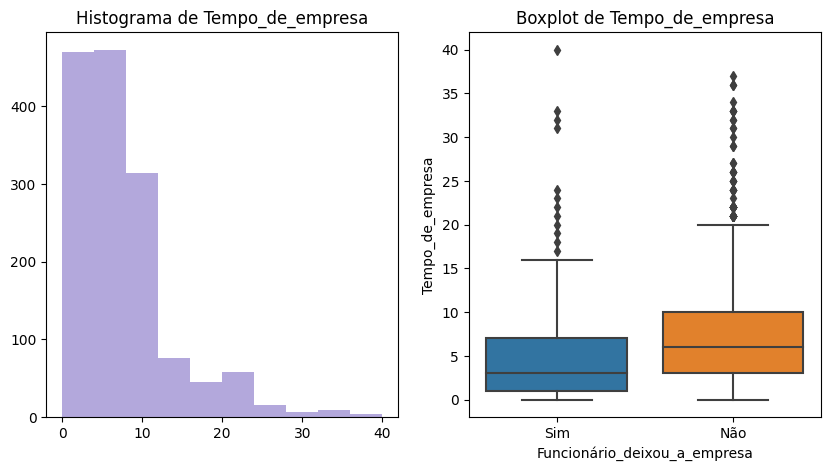

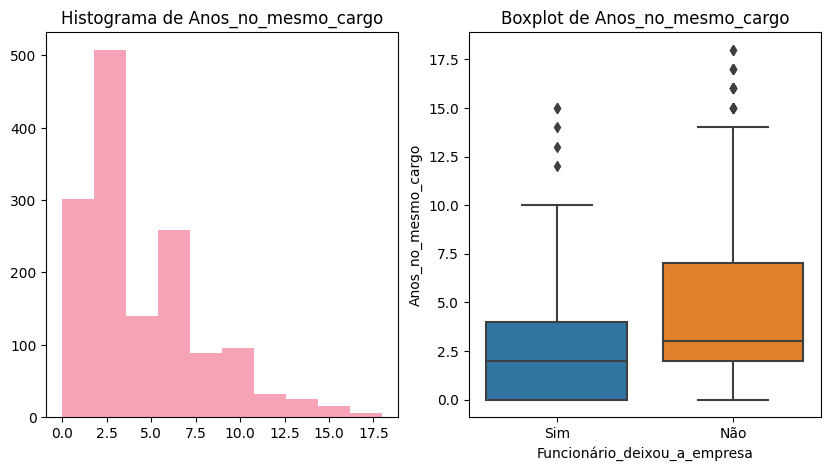

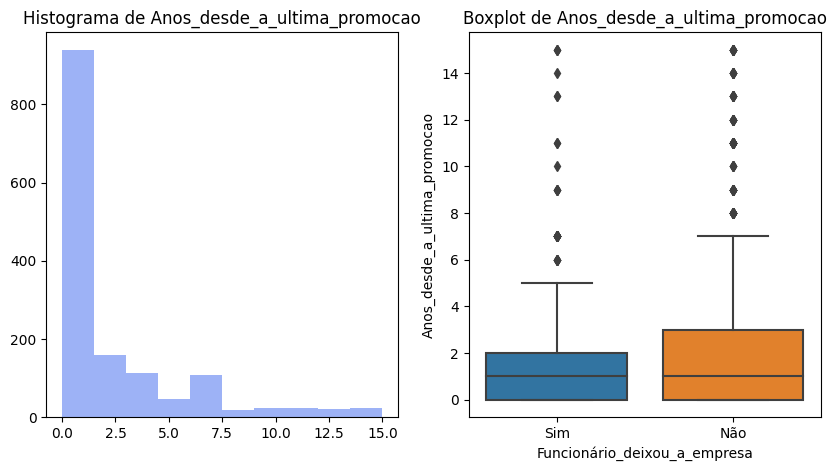

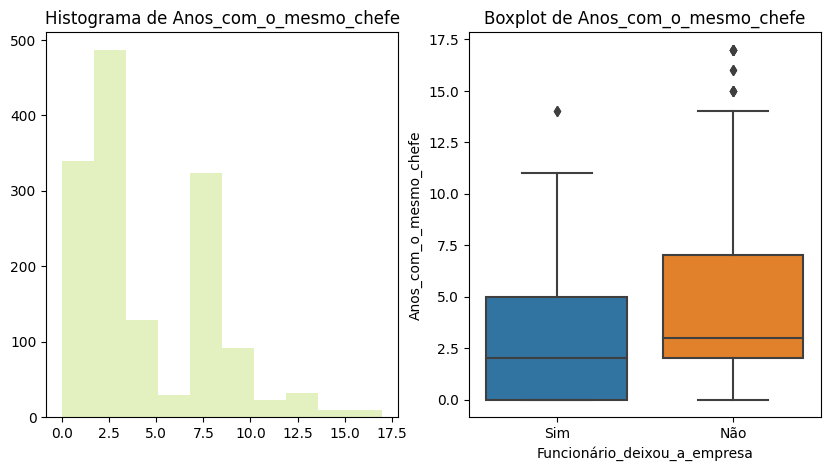

In [458]:
# Filtra o dataframe com variáveis quantitativas
df_quanti = df.loc[:,((df.dtypes == 'int64') | 
                                (df.dtypes == 'int32') |
                                (df.dtypes == 'float32') | (df.dtypes == 'float64'))]

#Remove o 1o item do df (variável ID)
df_quanti = df_quanti.drop(columns=['ID'])

for var in df_quanti:
    cria_grafico_var_quant(df,var)

In [459]:
#Definindo uma função para determinar o IV de uma variável categórica
#Nessa análise, utilizaremos a "Funcionário_deixou_a_empresa"
import numpy as np

def analise_iv(df,target,var_escolhida):

    # Cria a contagem de Target_1 e Target_0
    df_aux = df.copy() 
    df_aux['target2'] = df[target]
    df2 = df_aux.pivot_table(values='target2',index=var_escolhida, columns=target,aggfunc='count')
    colunas_originais = df2.columns
    df2.columns = ['#Target_0','#Target_1']
    df2.fillna(0,inplace=True)

    # Cria as demais colunas da tabela bivariada
    df2['Total'] = (df2['#Target_0']+df2['#Target_1'])
    df2['%Freq'] = (df2['Total']/(df2['Total'].sum())*100).round(decimals=2)
    df2['%Target_1'] = (df2['#Target_1']/(df2['#Target_1'].sum())*100).round(decimals=2)
    df2['%Target_0'] = (df2['#Target_0']/(df2['#Target_0'].sum())*100).round(decimals=2)
    df2['%Target_0'] = df2['%Target_0'].apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
    df2['%Taxa_de_Target_1'] = (df2['#Target_1']/df2['Total']*100).round(decimals=2)
    df2['Odds'] = (df2['%Target_1']/df2['%Target_0']).round(decimals=2)
    df2['Odds'] = df2.Odds.apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
    df2['LN(Odds)'] = np.log(df2['Odds']).round(decimals=2)
    df2['IV'] = (((df2['%Target_1']/100-df2['%Target_0']/100)*df2['LN(Odds)'])).round(decimals=2)
    df2['IV'] = np.where( df2['Odds'] == 0.01, 0 , df2['IV'] ) 

    df2 = df2.reset_index()
    df2['Variavel'] = var_escolhida
    df2 = df2.rename(columns={var_escolhida: 'Var_Range'})
    df2 = df2[['Variavel','Var_Range', '#Target_0', '#Target_1', 'Total', '%Freq', '%Target_0', '%Target_1',
   '%Taxa_de_Target_1', 'Odds', 'LN(Odds)', 'IV']]

    #print("Os valores",list(colunas_originais),"agora são ",['#Target_0','#Target_1'])
    #print(" ")
    #print("A média geral de '#Target_1' é: ",((df2['#Target_1'].sum())/(df2['Total'].sum())*100).round(decimals=2))
    #print(" ")
    print("O IV desta variável é: ",df2['IV'].sum().round(decimals=3))
    print(" ")
    
    return df2

In [460]:
analise_iv(df,"Funcionário_deixou_a_empresa","Faz_hora_extras?")

O IV desta variável é:  0.4
 


,Variavel,Var_Range,#Target_0,#Target_1,Total,%Freq,%Target_0,%Target_1,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Faz_hora_extras?,Não,944,110,1054,71.7,76.56,46.41,10.44,0.61,-0.49,0.15
1,Faz_hora_extras?,Sim,289,127,416,28.3,23.44,53.59,30.53,2.29,0.83,0.25


In [461]:
analise_iv(df,"Funcionário_deixou_a_empresa","Tempo_de_empresa")

O IV desta variável é:  0.42
 


,Variavel,Var_Range,#Target_0,#Target_1,Total,%Freq,%Target_0,%Target_1,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Tempo_de_empresa,0,28.0,16.0,44.0,2.99,2.27,6.75,36.36,2.97,1.09,0.05
1,Tempo_de_empresa,1,112.0,59.0,171.0,11.63,9.08,24.89,34.50,2.74,1.01,0.16
2,Tempo_de_empresa,2,100.0,27.0,127.0,8.64,8.11,11.39,21.26,1.40,0.34,0.01
3,Tempo_de_empresa,3,108.0,20.0,128.0,8.71,8.76,8.44,15.62,0.96,-0.04,0.00
4,Tempo_de_empresa,4,91.0,19.0,110.0,7.48,7.38,8.02,17.27,1.09,0.09,0.00
5,Tempo_de_empresa,5,175.0,21.0,196.0,13.33,14.19,8.86,10.71,0.62,-0.48,0.03
6,Tempo_de_empresa,6,67.0,9.0,76.0,5.17,5.43,3.80,11.84,0.70,-0.36,0.01
7,Tempo_de_empresa,7,79.0,11.0,90.0,6.12,6.41,4.64,12.22,0.72,-0.33,0.01
8,Tempo_de_empresa,8,71.0,9.0,80.0,5.44,5.76,3.80,11.25,0.66,-0.42,0.01
9,Tempo_de_empresa,9,74.0,8.0,82.0,5.58,6.00,3.38,9.76,0.56,-0.58,0.02


In [462]:
analise_iv(df,"Funcionário_deixou_a_empresa","Qte_ações_da_empresa")

O IV desta variável é:  0.33
 


,Variavel,Var_Range,#Target_0,#Target_1,Total,%Freq,%Target_0,%Target_1,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Qte_ações_da_empresa,0,477,154,631,42.93,38.69,64.98,24.41,1.68,0.52,0.14
1,Qte_ações_da_empresa,1,540,56,596,40.54,43.80,23.63,9.40,0.54,-0.62,0.13
2,Qte_ações_da_empresa,2,146,12,158,10.75,11.84,5.06,7.59,0.43,-0.84,0.06
3,Qte_ações_da_empresa,3,70,15,85,5.78,5.68,6.33,17.65,1.11,0.10,0.00
